# <center> Wi-Fi Dataset EDA </center>

## 1. Objective

### Business Context

* The demand and usage of the internet is growing across the globe and public wifi is becoming a new normal as we move forward. Wifi providers want to optimize the cost while providing the free and paid wifi. Here, we have a use case of public WiFi hotspots in New York City.
* The information comprises of records for every public WiFi hotspot (ones provided by or in partnership with the city) in New York City.
* We would analyze the data and try to infer if the free public WiFi tends to cluster around certain (more affluent) areas.

### Goal / Ask
* Based on the business context, we will be using unsupervised learning techniques such as clustering in order to identify clusters of wifi providers in the specific locations.
* However, prior to that, we need to answer few business questions by performing EDA (Exploratory Data Analysis) to understand the data.
* In this assignment, focus is limited to EDA. Please refer to the dataset shared.

## 2. Dataset Information

* Dataset has 10 columns/features and 2500+ records
* OBJECTID – unique identifier
* BORO – Borough of New York City (BX-Bronx, QU-Queens, MN-Manhattan, BK-Brooklyn, SI-Staten Island)
* TYPE – Type of wi-fi provided by the franchise
* PROVIDER – Franchise who is providing the wifi connection
* LAT – Latitude
* LON – Longitude
* LOCATION_T – Type of location that a wi-fi hotspot is present in
* CITY – The city in which the hotspot is located
* BoroCode – The NY City borough where the hotspots are located
* NTACode – Neighbourhood Tab Access by number

## 3. Business Questions for EDA

### Import relevant packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.stats import chi2_contingency

### 1. Get the data provided, check frequency distribution of the features, drop irrelevant and redundant features if any and state your inferences? 

#### Import the data and print a sample

In [2]:
df = pd.read_excel('wifi_data.xlsx')
df.sample(10)

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
978,902.0,BK,Limited Free,SPECTRUM,40.715088,-73.960502,Indoor,Brooklyn,3.0,BK73
2293,2292.0,BK,Free,Transit Wireless,40.677050,-73.972367,Subway Station,Brooklyn,3.0,BK64
1286,2249.0,MN,Free,Transit Wireless,40.724329,-73.997702,Subway Station,New York,1.0,MN24
2108,1305.0,SI,Limited Free,SPECTRUM,40.626860,-74.075848,Outdoor TWC Aerial,Staten Island,5.0,SI37
291,215.0,BK,Free,Downtown Brooklyn,40.692417,-73.987117,Outdoor,Brooklyn,3.0,BK38
1458,1771.0,BK,Free,BPL,40.605690,-73.986232,Library,Brooklyn,3.0,BK29
454,378.0,QU,Free,QPL,40.729253,-73.781909,Library,Flushing,4.0,QN41
2435,2435.0,QU,Free,LinkNYC - Citybridge,40.744278,-73.930399,Outdoor Kiosk,Queens,4.0,QN31
775,700.0,BX,Free,LinkNYC - Citybridge,40.864870,-73.892800,Outdoor Kiosk,Bronx,2.0,BX05
1244,2207.0,MN,Free,Transit Wireless,40.773620,-73.959874,Subway Station,New York,1.0,MN40


#### Get frequency distribution of all columns i.e print number of unique values/categories in each column

In [3]:
for i in df.columns:
    n = len(pd.unique(df[i]))
    print(i,n)

OBJECTID 2566
Borough 5
Type 3
Provider 15
Latitude 2390
Longitude 2375
Location_T 6
City 44
BoroCode 5
NTACode 178


#### Identify and remove irrelevant and redundant features 

Here we can observe that the following columns have too many unique values and therefore are redundant for our analysis:

1. OBJECTID
2. Latitude
3. Longitude

Therefore, we remove the above columns.

In [4]:
df = df.drop(['OBJECTID','Latitude','Longitude'], axis=1)

In [5]:
#convert all columns to categorical type
for col in df.columns:
    df[col] = df[col].astype('category')

### 2. Perform univariate and bivariate analysis and answer the following:

#### a) Which provider has the highest number of wi-fi hotspots?

The provider with the highest number of hotspots is LinkNYC - Citybridge


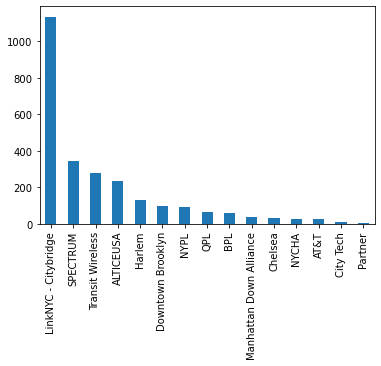

In [6]:
df['Provider'].value_counts().plot.bar()
a = df['Provider'].value_counts().idxmax()
print('The provider with the highest number of hotspots is',a)

#### b) Which provider provides the highest number of free wifi hotspots? Is the second highest provider same for “free wifi hotspots” compared to “all wifi hotspots”?

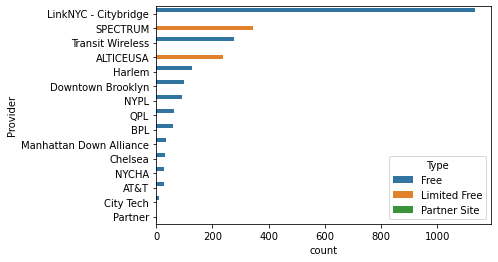

In [7]:
g = sns.countplot(y='Provider', hue='Type', data=df, order = df['Provider'].value_counts().index)

The highest provider of free hotspots is the same the highest provider of hotspots overall - **LinkNyc - Citybridge**.
However, **Spectrum** which is the second highest provider for "all wifi hotspots" is not the second highest provider of "free wifi hotspots"

#### c) List down the name of providers that provide “Limited Free” type of wifi?

In [8]:
print('The name of providers that provide “Limited Free” type of wifi are')
(df.loc[df['Type'] == 'Limited Free']).Provider.value_counts()

The name of providers that provide “Limited Free” type of wifi are


SPECTRUM                   343
ALTICEUSA                  237
AT&T                         1
BPL                          0
Chelsea                      0
City Tech                    0
Downtown Brooklyn            0
Harlem                       0
LinkNYC - Citybridge         0
Manhattan Down Alliance      0
NYCHA                        0
NYPL                         0
Partner                      0
QPL                          0
Transit Wireless             0
Name: Provider, dtype: int64

#### d) What is the correlation coefficient between borough and BoroCode?

In [9]:
CrosstabResult=pd.crosstab(index=df['Borough'],columns=df['BoroCode'])
print(CrosstabResult)

BoroCode   1.0  2.0  3.0  4.0  5.0
Borough                           
BK           1    0  593    1    0
BX           0  257    0    0    0
MN        1204    0    0    0    0
QU           0    0    0  415    0
SI           0    0    0    0   95


_Define the hypothesis:_

<p> H0: The two columns are not related to each other<br>
H1: The two columns are related to each other</p>

We perform a Chi-square test to check the correlation between the two variables. 
If the p-value is greater than 0.5, then we accept H0. The closer the p-values is to 0, the higher the correlation.

In [10]:
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


Therefore, we can conclude that the variables "Borough" and "BoroCode" are highly correlated with each other.

#### e) Are there any indoor free wifi hotspots?

<AxesSubplot:xlabel='count', ylabel='Location_T'>

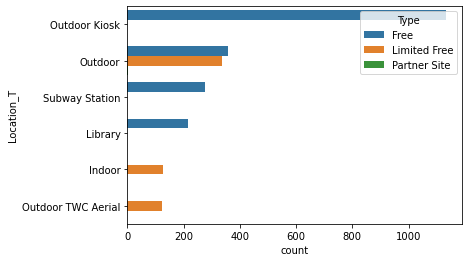

In [11]:
sns.countplot(hue='Type', y='Location_T', data=df, order = df['Location_T'].value_counts().index)

There are no indoor free wi-fi hotspots.

#### f) Which city has the “partner_site” type wifi hotspot? 

In [12]:
vc = (df.loc[df['Type'] == 'Partner Site']).City.value_counts()
print('The city with type "Partner Site" is',vc[vc>0].index[0])

The city with type "Partner Site" is New York
